## Model Generalization
#### _intel software_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

In [2]:

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [3]:
# Define the K values to be tested
k_values = [1, 5, 10]

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

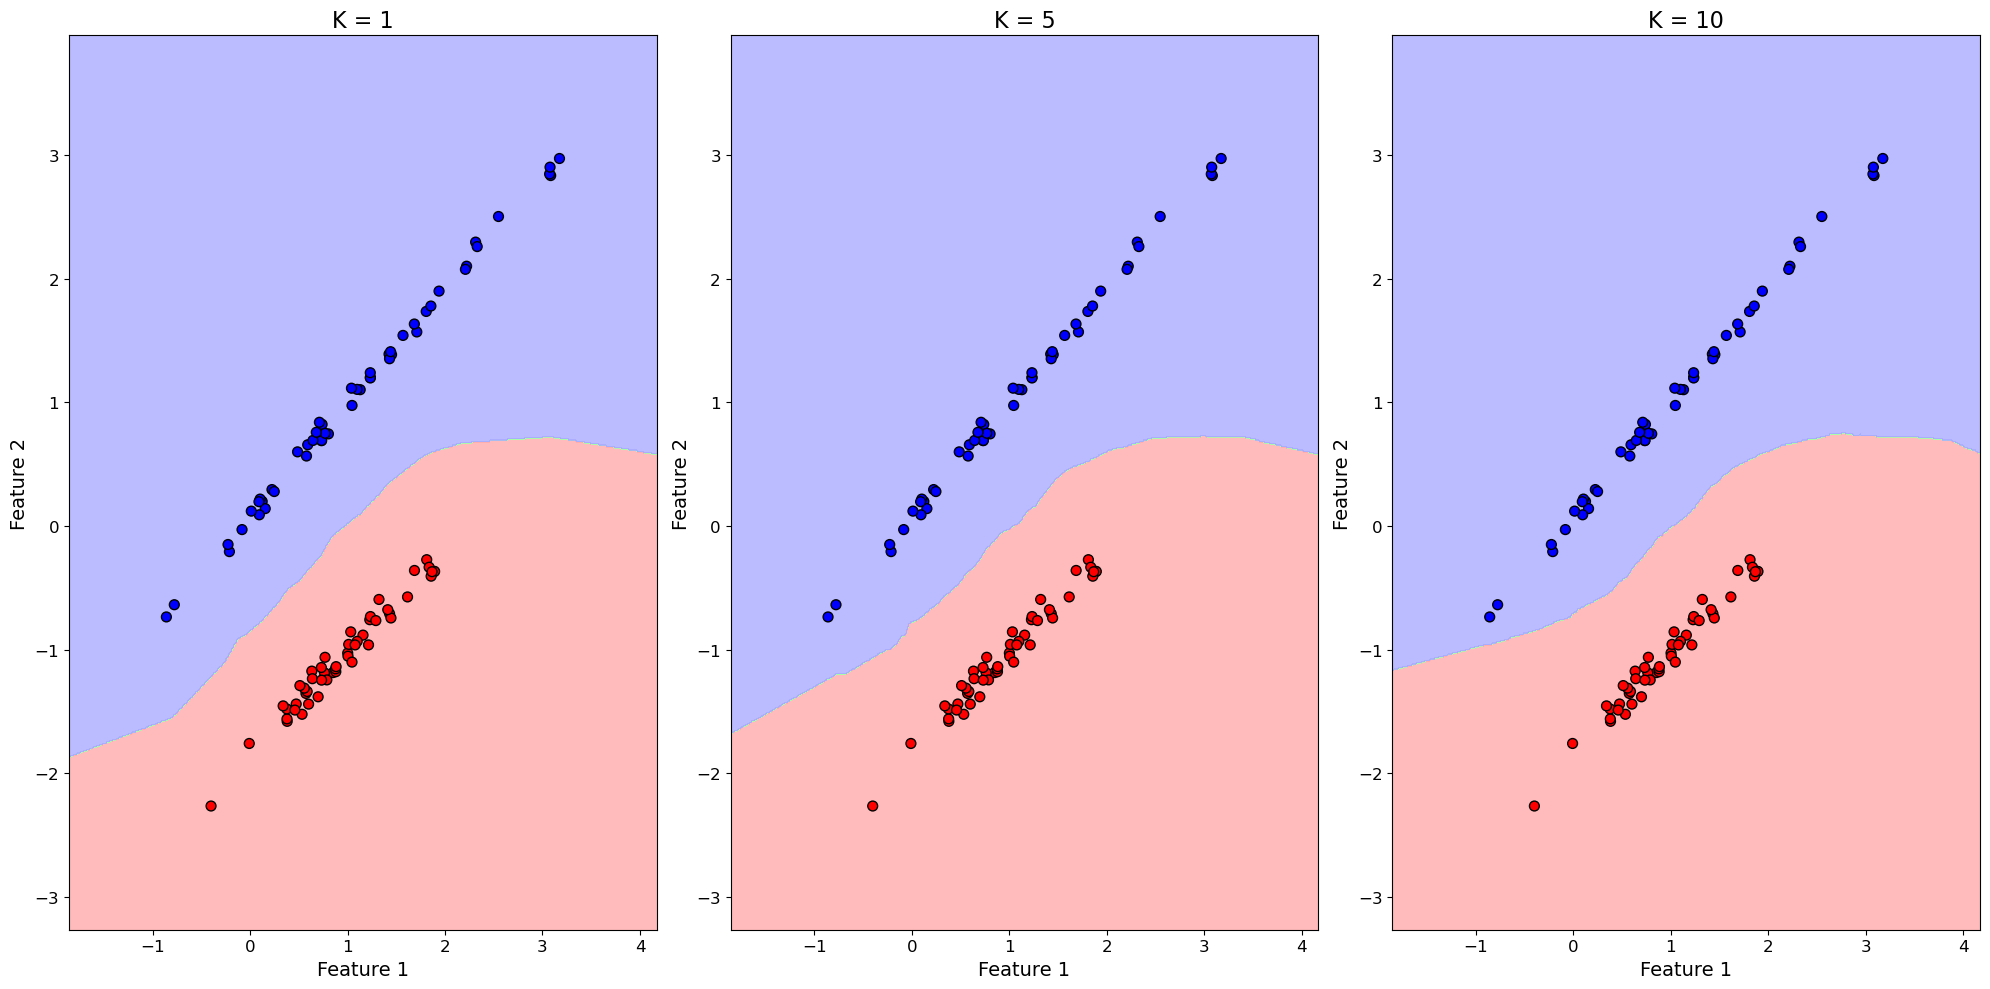

In [5]:
# Plot the decision boundaries for each K value
plt.figure(figsize=(20, 10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot the decision boundary by assigning a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, len(k_values), i + 1)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
    plt.title(f'K = {k}', fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### K Value Affects Decision Boundary, Different Complexities, Model Generalize

In [2]:
!pip3 install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 28.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 30.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn

# Enable Intel optimizations
patch_sklearn()

# Step 1: Create a Basic Dataset
data = {
    'Company': ['Apple', 'Samsung', 'Huawei', 'Motorola', 'Google', 'Vivo', 'OnePlus', 'RedMagic'],
    'Market_Share': [30.2, 27.5, 15.3, 10.4, 8.1, 7.2, 1.3, 0.8],
    'Usage': [85, 80, 75, 70, 65, 60, 55, 50]
}
df = pd.DataFrame(data)

# Convert categorical data to numerical
df['Company'] = df['Company'].astype('category').cat.codes

# Features and target variable
X = df[['Company', 'Market_Share']]
y = df['Usage']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Cross-Validation
knn = KNeighborsClassifier(n_neighbors=3)
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=42)
cross_val = cross_val_score(knn, X, y, cv=cv, scoring='neg_mean_squared_error')

print("Cross-Validation Scores:", cross_val)
print("Mean Cross-Validation Score:", np.mean(cross_val))

# Step 4: Measure Inference Time
# Original Scikit-learn
start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
original_time = time.time() - start_time

# Patched Scikit-learn
patch_sklearn()
start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
patched_time = time.time() - start_time

print(f"Original Scikit-learn Inference Time: {original_time:.6f} seconds")
print(f"Patched Scikit-learn Inference Time: {patched_time:.6f} seconds")

Cross-Validation Scores: [-216.66666667 -175.         -175.          -50.        ]
Mean Cross-Validation Score: -154.16666666666666
Original Scikit-learn Inference Time: 0.003623 seconds
Patched Scikit-learn Inference Time: 0.003017 seconds


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Complete